In [1]:
import os
import sys
import json
import time
import datetime
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy 
import scipy.io
# Load the annotations and labels of the dataset
cars_meta = scipy.io.loadmat('data/cars_annos.mat')

In [3]:
data_dir = 'data'

train_dir = os.path.join(data_dir, 'cars_train/cars_train')
test_dir = os.path.join(data_dir, 'cars_test/cars_test')

# Create a list of all the images in the train directory
train_images = os.listdir(train_dir)
test_images = os.listdir(test_dir)

# Count of images in each directory
print('Number of images in train directory: ', len(train_images))
print('Number of images in test directory: ', len(test_images))

Number of images in train directory:  8144
Number of images in test directory:  8041


In [21]:
# Convert cars_meta to a dataframe
cars_meta = pd.DataFrame(cars_meta['annotations'][0])
cars_meta = pd.DataFrame(cars_meta['class_names'].tolist())
cars_meta.columns = ['annotations', 'class_names']

# Convert the class names to a list


KeyError: 'annotations'

In [4]:
cars_meta.keys()

dict_keys(['__header__', '__version__', '__globals__', 'annotations', 'class_names'])

In [5]:
# show class names
cars_meta['class_names']

array([[array(['AM General Hummer SUV 2000'], dtype='<U26'),
        array(['Acura RL Sedan 2012'], dtype='<U19'),
        array(['Acura TL Sedan 2012'], dtype='<U19'),
        array(['Acura TL Type-S 2008'], dtype='<U20'),
        array(['Acura TSX Sedan 2012'], dtype='<U20'),
        array(['Acura Integra Type R 2001'], dtype='<U25'),
        array(['Acura ZDX Hatchback 2012'], dtype='<U24'),
        array(['Aston Martin V8 Vantage Convertible 2012'], dtype='<U40'),
        array(['Aston Martin V8 Vantage Coupe 2012'], dtype='<U34'),
        array(['Aston Martin Virage Convertible 2012'], dtype='<U36'),
        array(['Aston Martin Virage Coupe 2012'], dtype='<U30'),
        array(['Audi RS 4 Convertible 2008'], dtype='<U26'),
        array(['Audi A5 Coupe 2012'], dtype='<U18'),
        array(['Audi TTS Coupe 2012'], dtype='<U19'),
        array(['Audi R8 Coupe 2012'], dtype='<U18'),
        array(['Audi V8 Sedan 1994'], dtype='<U18'),
        array(['Audi 100 Sedan 1994'], dtype='<U

In [6]:
# Create a dataframe from the list of images
train_df = pd.DataFrame(train_images, columns=['image'])

# Add the full path to the image
train_df['image'] = train_df['image'].apply(lambda x: os.path.join(train_dir, x))


In [7]:
train_df.head(10)

,image
0,data/cars_train/cars_train/04354.jpg
1,data/cars_train/cars_train/02725.jpg
2,data/cars_train/cars_train/07885.jpg
3,data/cars_train/cars_train/06543.jpg
4,data/cars_train/cars_train/00132.jpg
5,data/cars_train/cars_train/00654.jpg
6,data/cars_train/cars_train/06225.jpg
7,data/cars_train/cars_train/02043.jpg
8,data/cars_train/cars_train/04432.jpg
9,data/cars_train/cars_train/02057.jpg


In [8]:
# Merge with class names
train_df = train_df.merge(pd.DataFrame(cars_meta['class_names'][0]), left_index=True, right_index=True)

In [10]:
train_df[0] = train_df[0].apply(lambda x: x[0])
train_df.rename(columns={0: 'class_name'}, inplace=True)


In [11]:
train_df.head(10)

,image,class_name
0,data/cars_train/cars_train/04354.jpg,AM General Hummer SUV 2000
1,data/cars_train/cars_train/02725.jpg,Acura RL Sedan 2012
2,data/cars_train/cars_train/07885.jpg,Acura TL Sedan 2012
3,data/cars_train/cars_train/06543.jpg,Acura TL Type-S 2008
4,data/cars_train/cars_train/00132.jpg,Acura TSX Sedan 2012
5,data/cars_train/cars_train/00654.jpg,Acura Integra Type R 2001
6,data/cars_train/cars_train/06225.jpg,Acura ZDX Hatchback 2012
7,data/cars_train/cars_train/02043.jpg,Aston Martin V8 Vantage Convertible 2012
8,data/cars_train/cars_train/04432.jpg,Aston Martin V8 Vantage Coupe 2012
9,data/cars_train/cars_train/02057.jpg,Aston Martin Virage Convertible 2012


In [14]:
# Plot images with annotations with function
def plot_images(df, n=10):
    fig, ax = plt.subplots(2, 5, figsize=(20, 10))
    for i in range(n):
        img = plt.imread(df['image'][i])
        ax[i//5, i%5].imshow(img)
        ax[i//5, i%5].set_title(df['class_name'][i])
        ax[i//5, i%5].axis('off')
    plt.show()

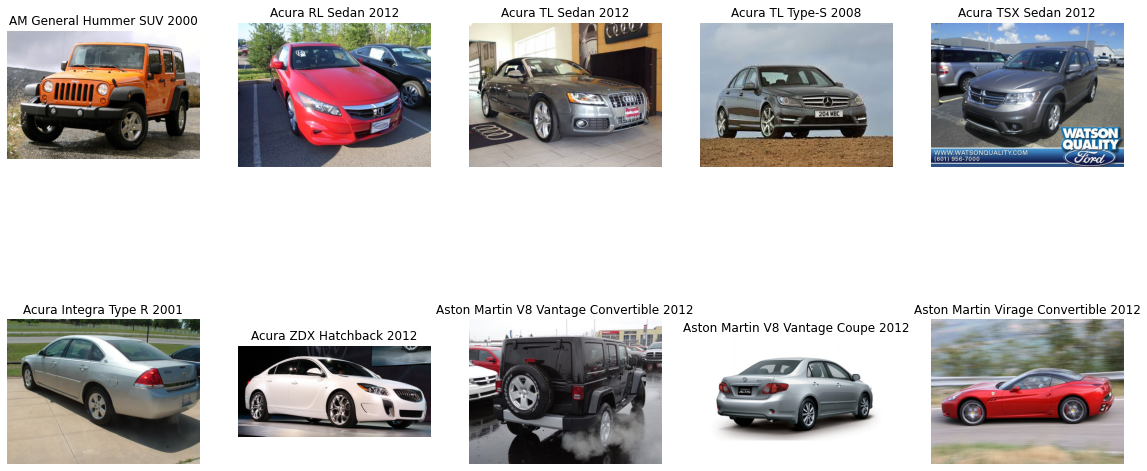

In [15]:
plot_images(train_df)